**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2021**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 02

**Datos de la entrega:** Domingo 12 de setiembre 2021, a más tardar a las 11:59 pm

**Estudiantes:**
- Jose Pablo Salazar Granados 2018107213
- Lindsay Morales Bonilla


# Parte 1.  Series temporales y graficación  (52 puntos)

1. Se adjunta un archivo en formato PDF titulado: Lectura_Caps_1-6_15. Estudie los capítulos 1 a 6 (los tres primeros capítulos ya los había estudiado en otro trabajo). Se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo 'daily-max-temperatures.csv' realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.


In [66]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import concat
from pandas import Series
from pandas import Grouper
from pandas import DataFrame
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

### 1.1
- Cargue el archivo.
- Muestre los cinco primeros registros.
- Muestre qué tipo de datos es la variable  series

In [67]:
series = pd.read_csv('daily-max-temperatures.csv', header=0, parse_dates=[0], index_col=0, squeeze=True )
print(series.head(5)) # Se especifica la cantidad de registros
print(type(series))

Date
1981-01-01    38.1
1981-01-02    32.4
1981-01-03    34.5
1981-01-04    20.7
1981-01-05    21.5
Name: Temperature, dtype: float64
<class 'pandas.core.series.Series'>


### 1.2
- Muestra el promedio y la desviación estándar de los datos

In [68]:
seriesMean = series.mean()
seriesStanDeviation = series.std()
print("promedio: "+ str(seriesMean))
print("desviación estándar: " + str(seriesStanDeviation))


promedio: 20.009150684931505
desviación estándar: 6.108353282275072


### 1.3
- Muestre el promedio para cada uno de los meses del año. Es decir, el promedio para todos los eneros, luego el promedio para todos los febreros, y así sucevivamente.

In [69]:
series.resample('M').mean()

Date
1981-01-31    29.548387
1981-02-28    27.832143
1981-03-31    23.158065
1981-04-30    22.153333
1981-05-31    17.116129
                ...    
1990-08-31    14.361290
1990-09-30    17.470000
1990-10-31    20.600000
1990-11-30    22.903333
1990-12-31    25.458065
Freq: M, Name: Temperature, Length: 120, dtype: float64

### 1.4 
- Utilizando la técnica de Lag Features, cree un DataFrame con los valores y un Lag=3

In [70]:
temps = DataFrame(series.values)
dataframe = concat([temps.shift(3), temps], axis=1)
dataframe.columns = ['t-3', 't']
print(dataframe.head(10))

    t-3     t
0   NaN  38.1
1   NaN  32.4
2   NaN  34.5
3  38.1  20.7
4  32.4  21.5
5  34.5  23.1
6  20.7  29.7
7  21.5  36.6
8  23.1  36.1
9  29.7  20.6


### 1.5
- Utilizando la técnica de rolling window, cree un DataFrame con los valores, y un ancho de ventana de 2. Tenga las columnas: 'mínimo','media','máximo','t+1'

In [71]:
temps = DataFrame(series.values)
width = 2
shifted = temps.shift(width - 1)
window = shifted.rolling(window = width)
dataframe = concat( [window.min(), window.mean(),window.max(),temps], axis=1 )
dataframe.columns = ['mínimo','media','máximo','t+1']
print(dataframe.head(5))

   mínimo  media  máximo   t+1
0     NaN    NaN     NaN  38.1
1     NaN    NaN     NaN  32.4
2    32.4  35.25    38.1  34.5
3    32.4  33.45    34.5  20.7
4    20.7  27.60    34.5  21.5


### 1.6
- A la variable series, aplíquele la instrucción series.plot(). 
- ¿Qué puede decir del comportamiento de los datos según este gráfico?

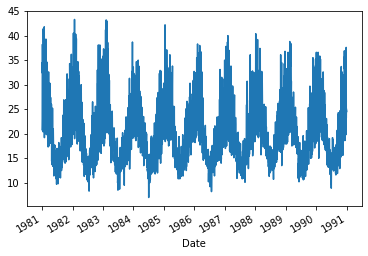

In [59]:
series.plot()
plt.show()

Observación: Al inicio de cada año las temperaturas son más altas. Entre cada año podemos ver como se alcanza el punto mínimo. Este patrón se repite por lo que al inicio de cada año las temperaturas son las más altas y luego descienden gradualmente hasta la mitad del año respectivo y comienzan a subir. La mayoría de los datos se encuentran de la mitad para arriba por lo que existen menos bajas temperaturas. 

### 1.7

- Agrupe los datos y muestre un gráfico similar al de la seccion 6.4 de las lecturas (Stacked lines plots).  
- ¿Puede hacer algún comentario del comportamiento anual de los datos?

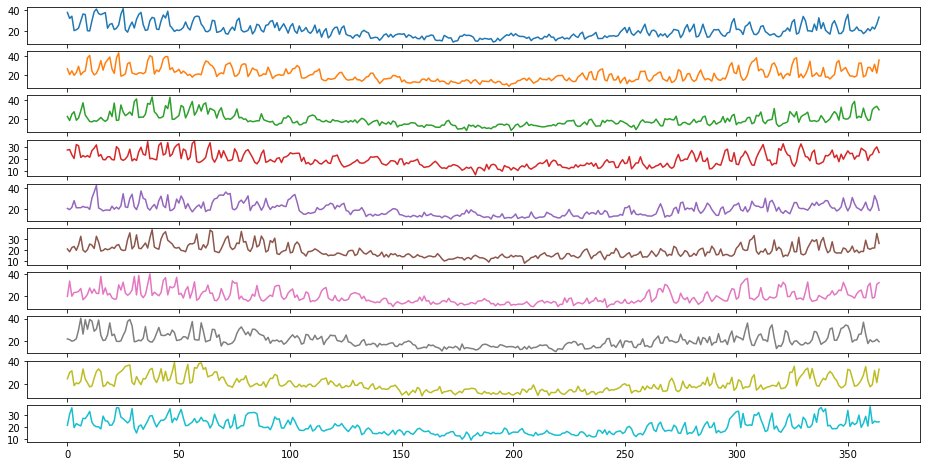

In [60]:
groups = series.groupby(pd.Grouper(freq='A')) # Anual
years = DataFrame() 
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False, figsize=(16,8))  # this size allows a better data comprehension
plt.show()

# COMENTARIO DEL PLOT ANTERIOR AQUI :D  (Not a MEME, no budget srry)

COMENT PREVIOUS THING


### 1.8
- Muestre el histograma de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


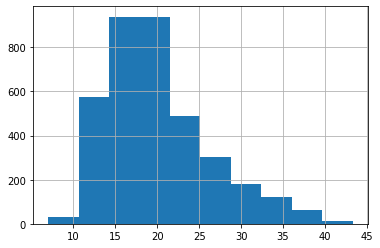

In [61]:
series.hist()
plt.show()

### 1.9
- Muestre el gráfico de densidad de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


<function matplotlib.pyplot.show(close=None, block=None)>

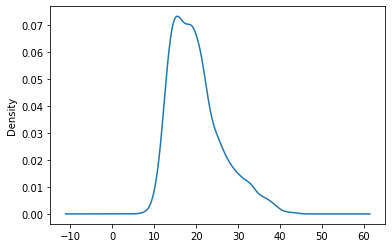

In [62]:
series.plot(kind='kde')
plt.show

## Respuestas

### 1.10
- Agrupe los datos de la variable serie de manera Anual, y muestre los Boxplot de cada año. 
1. ¿Cómo se interpreta un gráfico Boxplot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?

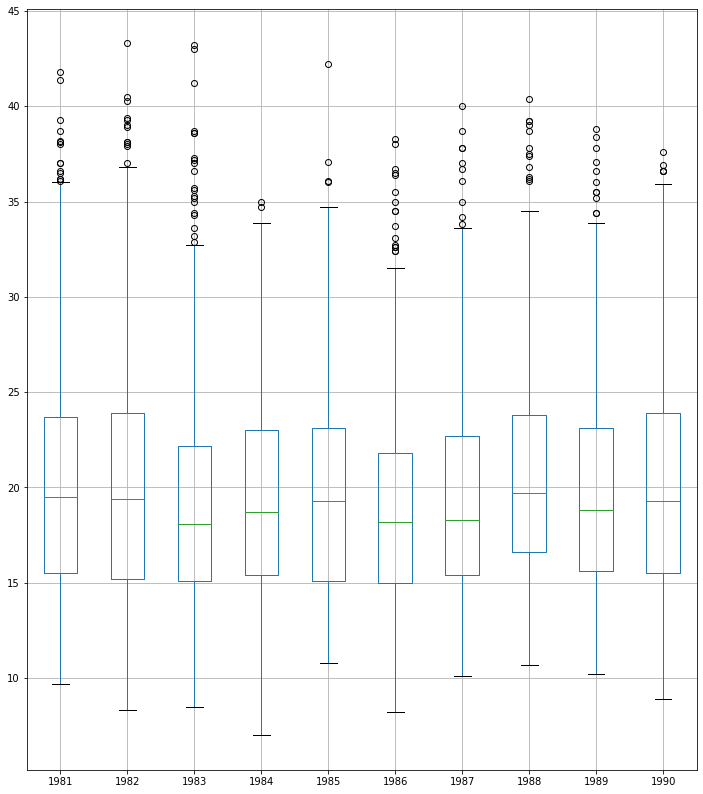

In [63]:
groups = series.groupby(pd.Grouper(freq='A')) 
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot(figsize=(12,14)) # this size allows a better data comprehension
plt.show()

## Respuestas

### 1.11
- Agrupe los datos de la variable serie de manera Anual, y muestre el Heat Map por año. 
1. ¿Cómo se interpreta un gráfico Heat Map?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


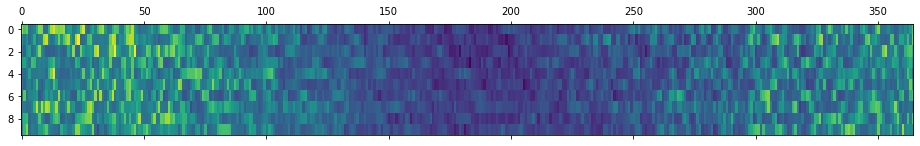

In [64]:
groups = series.groupby(pd.Grouper(freq='A')) 
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
plt.matshow(years, aspect='auto') 
plt.show()

## Respuestas
1. El gráfico debe entenderse de manera tal que mientras más cálido el color más grande es el valor en ese segmento. Mientras más frío el color menor el valor del segmento. 
1. Podemos asumir lo mismo que inferimos en el paso 1.6 donde indicamos que las temperaturas más bajas son a mitad de año y los picos los encontramos al inicio de cada año. Esto es correcto dado que los colores más calidos están en los extremos (inicio y fin de los años, al ser circular está bien ajustada la interpretación).

### 1.12
- Muestre el Lag Scatter plot de la variable series. 
1. ¿Cómo se interpreta un Lag Scatter plot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


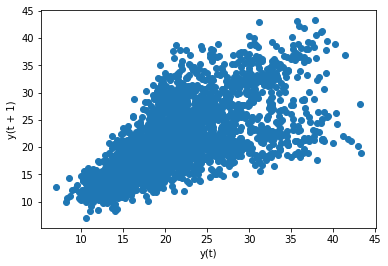

In [65]:
lag_plot(series)
plt.show()

## Respuestas
1. Se entiende que mientras más recta sea la diagonal mayor es la relación que existe entre los valores. Si se nota muy dispersa la diagonal entonces la relación es débil
1. Mientras aumentan los valores en y(t) los puntos se distribuyen cada vez más lejos de la diagonal, implicando así un cambio en la relación de mediana/fuerte a débil.

### 1.13
- Muestre el gráfico Autocorrelación de la variable series. 
1. ¿Cómo se interpreta este tipo de gráficos?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


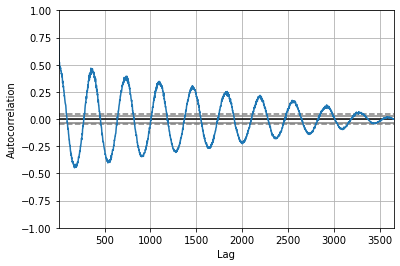

In [72]:
autocorrelation_plot(series)
plt.show()

## Respuestas
1. Mientras más grande la amplitud mayor es la autocorrelación de las variables. Hacia arriba es relación positiva porque se acerca a 1 y abajo negativa por acercarse a -1.
1. Encontramos que mientras más Lag tenemos más se debilita la autocorrelación hasta el punto donde no existe relación alguna.

# Parte 2.  Diferenciación  (20 puntos)

1. Se adjunta un archivo en formato PDF titulado: Lectura_Caps_1-6_15. Estudie el capítulo 15. Se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo 'yearly-water-usage.csv' realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.

### 2.1
- Cargue el archivo proporcionado y muestre los 4 primeros registros.

### 2.2

- Aplique el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)

### 2.3

- Aplique la "Diferenciación" a la serie, y al resultado vuelva a aplicarle el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)

### 2.4

- En un mismo gráfico de líneas, presente la serie original (en azul) y la serie diferenciada (en rojo).

### 2.5

- ¿Qué cambio nota de la serie antes de diferenciar a la serie diferenciada?


# Parte 3.  Regresión lineal y breve diseño experimental  (28 puntos)

Se le suministra un archivo llamado datos_practica2.csv.  

### 3.1
- Cargue el archivo.
- Muestre cuántas filas tiene el conjunto de datos.
- Revise si la serie es o no estacionaria. Aplique el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05). Y haga la diferenciación en caso de ser no estacionaria.


### 3.2
- Utilizando la técnica de Lag Features, cree un DataFrame con los valores y un Lag=30
- Utilice dropna() para borrar cualquier fila con NA
- Muestre la primera fila.

Se podrá ver algo así:

    t-29  t-28  t-27  t-26  t-25  t-24  t-23  t-22  t-21  t-20  ...   t-8  \
30  38.1  32.4  34.5  20.7  21.5  23.1  29.7  36.6  36.1  20.6  ...  21.7   

     t-7   t-6   t-5   t-4   t-3   t-2   t-1     t   t+1  
30  22.9  26.2  36.5  41.8  21.5  19.2  25.0  28.9  23.2  

[1 rows x 31 columns]

### 3.3
- Divida entre X e y.
- Escale X utilizando MinMaxScaler. 
- Agregue como primer columna el bias (llena de 1's).
- Muestre los tres primeros registros.

### 3.4
- Divida entre train y test (tanto X como y).
- Utilice 70% train y 30% test, modo aleatorio.


### 3.5

- Vamos ahora a utilizar sklearn para calcular los pesos.
- Utilizando from sklearn.linear_model import LinearRegression, y la división anterior en train y test. Ajuste el modelo y calcule $y_{pred}$, calcule las métricas $R2$ y $MSE$ entre el $y_{pred}$ y el $y_{test}$. 


### 3.6

- En esta parte vamos a probar los conceptos de  tran/validation/test y cross-validation.
- Usando KFold y regresión Ridge, prepare un diseño experimental con 80% para el cross-validation y 20% para el test (distribución de manera aleatoria), con 5 folds. 
- La idea es encontrar el mejor valor para el hiperparámetro alfa en el modelo (factor de regularización). 
- Muestre los resultados obtenidos y coméntelos (mismas métricas $R2$ y $MSE$ ).


### 3.7

- Analice cómo se comporta no solo el promedio, sino la desviación estándar.